Intro to Using NWB Data
============

In this tutorial, you will learn :

1. Parsing the **nwb data** 
2. Getting the **fluorescence traces**

Getting Started
---------------

Be sure you've installed the *Allen SDK Package*.

If you haven't, follow this link: [Allen SDK Package Installation](http://localhost:8000/beginners/installation/)

Import Libraries 

The libraries we will be using are as follows:

* **BrainObservatoryCache** contains methods for accessing and parsing our data
* **pprint** for formatting our data, making it easy to read
* **pyplot** provides a MATLAB-like plotting framework
* **BrainObservatoryNwbDataSet** contains methods for retrieving information from NWB files.

We will import the libraries into the Jupyter Notebook cells when we are ready to use them. We will first start with the **BrainObservatoryCache** and **pprint**.

In [4]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import pprint

the four lines of code in the cell below quickly gets us access to an arbitrary **nwb data** file belonging to a session C, from a single **ophys experiment**. 

If confused, review the **Intro to Experiment Containers** or the **Intro to Ophys Experiments** tutorials. 



In [8]:
#create the manifest file.
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')
#get a single ophys experiment
ophys_experiment= boc.get_ophys_experiments(experiment_container_ids=[511510729])
#get the session C information.
session_C_Metadata = ophys_experiment[0]
#get the 'id' value from the session C Json object and pass that is as an 
#argument. this will give us the nwb data for the session C experiment.
nwb_data = boc.get_ophys_experiment_data(session_C_Metadata['id'])


1. Parsing Through the NWB File
--------------------------------
Now that we have the NWB data, we have methods that we can use to grab specific information from this file! 
Let's start by looking at the metadata that describes the data found in the nwb file using the *get_metadata()* method.

In [6]:
nwb_data.get_metadata()

{'age_days': 81,
 'cre_line': u'Rorb-IRES2-Cre/wt',
 'device': u'Nikon A1R-MP multiphoton microscope',
 'device_name': u'CAM2P.2',
 'excitation_lambda': u'910 nanometers',
 'experiment_container_id': 511510729,
 'fov': u'400x400 microns (512 x 512 pixels)',
 'genotype': u'Rorb-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)',
 'imaging_depth_um': 275,
 'indicator': u'GCaMP6f',
 'ophys_experiment_id': 504614224,
 'pipeline_version': u'2.0',
 'session_start_time': datetime.datetime(2016, 2, 29, 16, 53, 9),
 'session_type': u'three_session_C',
 'sex': u'male',
 'specimen_name': u'Rorb-IRES2-Cre;Camk2a-tTA;Ai93-228786',
 'targeted_structure': u'VISl'}

Next we can try out the *get_cell_speciment_ids()* method! This will give us an array which contains a list of all the cells within the mouse cortex that were recorded from. 

In [13]:
cell_specimens = nwb_data.get_cell_specimen_ids()
print(cell_specimens)

[517424402 517424391 517424380 517424372 517425006 517427291 517424522
 517424983 517426579 589161672 517424976 589159845 517426620 589161744
 517427280 517424531 517427270 517424543 517427328 517427259 517427319
 589167693 589167615 589167726 589167520 589167657 589167399 589167573
 517427665 517427673 517427681 517428404 517423860 517428057 517423804
 517423813 517423888 517428065 517427151 517425563 517427457 517425553
 517427468 517427354 517427367 589163666 517423976 517425215 517425202
 517426225 517426193 517423575 517426214 517426170 517423651 517426203
 517427067 517424668 517424578 517424630 517424615 517424608 517425985
 517425187 517425251 517425226 517425237 589168393 589159861 517425147
 517425157 589162242 517424966 517426860 517426562 517424862 517426849
 517424918 517424907 517424425 517424413 517424504 517424495 517428079
 517424359 517424346 517423847 517427189 517426297 517428164 589161618
 517426930 517427049 517426568 517426582 517426595 517424991 589163884
 51742

let's now quickly get the length of this list to see how many cells were observed!

In [12]:
print len(cell_specimens)

268


Another thing we can look at is where specific cell specimen ids are located in the array for this session C recording. We use the **get_cell_specimen_indices()** method and pass a list of cell specimen ids we want to locate. This will then return to us the index values of these cell specimen ids in the array. 

In [17]:
cell_indices = nwb_data.get_cell_specimen_indices([517425344, 517428147])
print(cell_indices)

[242, 267]


2. Getting the Fluorescence Traces
--------------------------------

Now, let's start looking at the kinds of data visualizations you can make from the data. 

We will start by using the **get_corrected_fluorescence_traces()** method, and pass in an arbitrary cell specimen id from within the *cell_specimens* array above. 

In [34]:
fluorescence_traces = nwb_data.get_corrected_fluorescence_traces(cell_specimen_ids=[517425344])
print(fluorescence_traces)
#print the length of the first array
print(len(fluorescence_traces[0]))
#print the length of the second array 
print(len(fluorescence_traces[1][0]))


(array([    5.42826,     5.46152,     5.49477, ...,  3521.03251,
        3521.06577,  3521.09903]), array([[ 199.81019592,  179.89129639,  179.59910583, ...,  159.67230225,
         140.38891602,  159.06082153]], dtype=float32))
105713
105713


Since the fluoresence traces contains two arrays, one for cell fluorescence and the other for time, we can save each array as a variable *time* and *corrected_traces*, as shown below.

In [36]:
time, corrected_traces = fluorescence_traces

Next, we can import matplotlib (don't forget in jupyter notebooks to use **%matlplotlib inline**) and plot a figure of time vs fluoresence. 

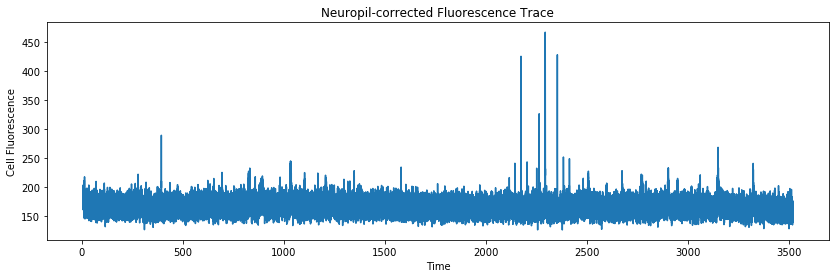

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,4))
plt.title("Neuropil-corrected Fluorescence Trace")
plt.plot(time, corrected_traces[0])
plt.xlabel("Time")
plt.ylabel("Cell Fluorescence")
plt.show()

There are quite a few other methods, such as the *get_roi_ids()*. We'll use these in further tutorials. 

In [51]:
nwb_data.get_roi_ids()

array(['585685145', '585685149', '585685153', '585685157', '585685311',
       '585685313', '585685315', '585685317', '585685319', '585685322',
       '585685325', '585685329', '585685332', '585685336', '585685340',
       '585685344', '585685348', '585685351', '585685354', '585685358',
       '585685367', '585685382', '585685413', '585685416', '585685426',
       '585685429', '585685432', '585685435', '585685444', '585685448',
       '585685458', '585685480', '585685486', '585685491', '585685495',
       '585685517', '585685528', '585685596', '585685599', '585685603',
       '585685607', '585685610', '585685614', '585685616', '585685618',
       '585685622', '585685624', '585685626', '585685629', '585685634',
       '585685638', '585685643', '585685647', '585685651', '585685655',
       '585685665', '585685680', '585685787', '585685792', '585685807',
       '585685811', '585685813', '585685817', '585685819', '585685821',
       '585685823', '585685825', '585685829', '585685833', '5856